# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')



## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric and 4 string columns in the dataset.
* The target variable is the normalized used price of a device, which is a float type.

In [ ]:
data.shape

(3454, 15)

* The dataset contains 3,454 devices with 15 different attributes.

In [ ]:
data.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


*   The normalized used price varies from 1.5 to 6.2.
*   The mean normalzied used price is 4.4.
* The most popular OS is Android.



In [ ]:
data.duplicated().sum()

0

* There are no duplicate values.

In [ ]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* There are missing values in the columns: main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight.

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

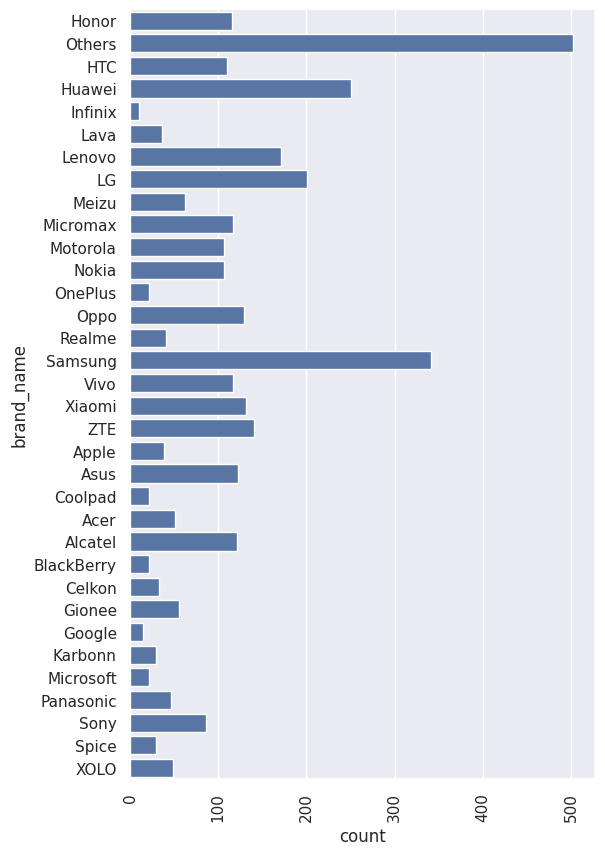

In [ ]:
plt.figure(figsize=(6, 10))
sns.countplot(df['brand_name'])
plt.xticks(rotation=90)
plt.show()

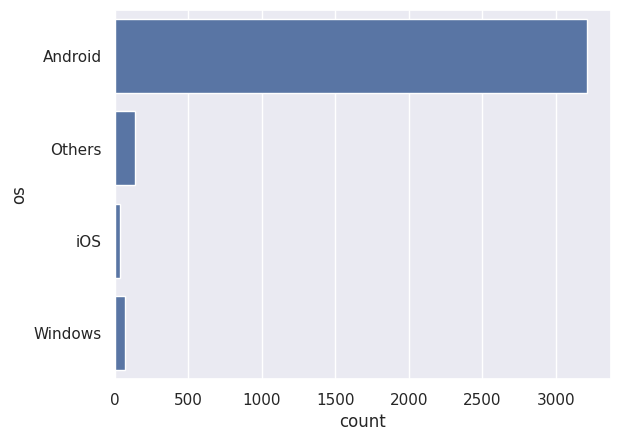

In [ ]:
sns.countplot(df['os'])
plt.show()

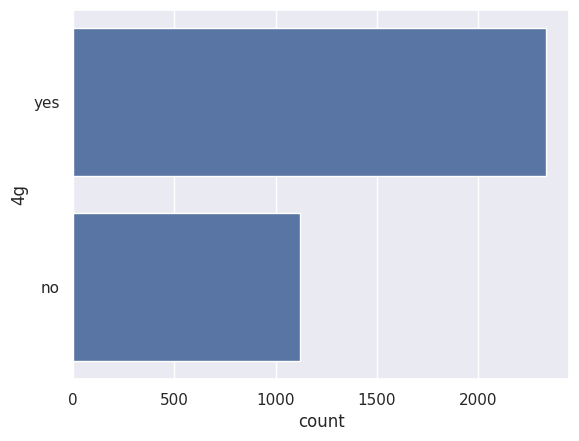

In [ ]:
sns.countplot(df['4g'])
plt.show()

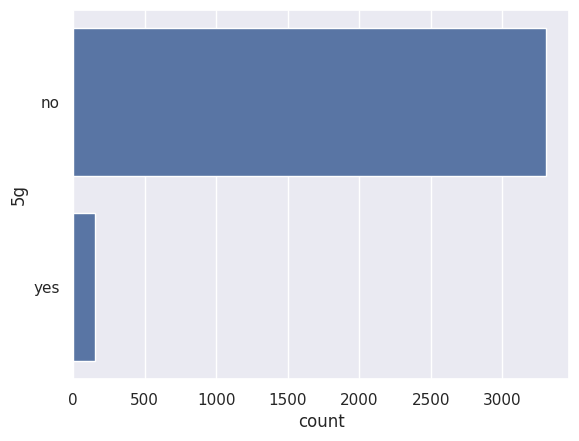

In [ ]:
sns.countplot(df['5g'])
plt.show()

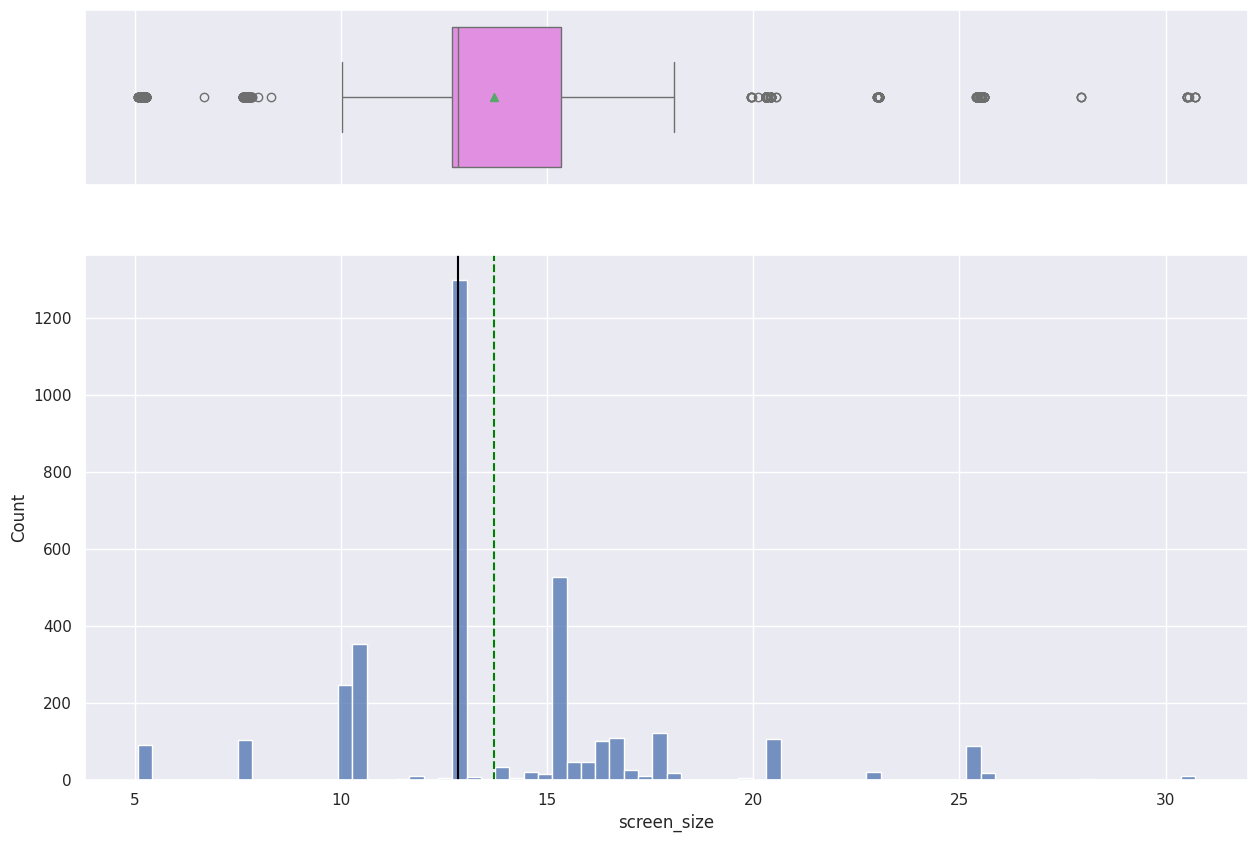

In [ ]:
histogram_boxplot(df, 'screen_size')

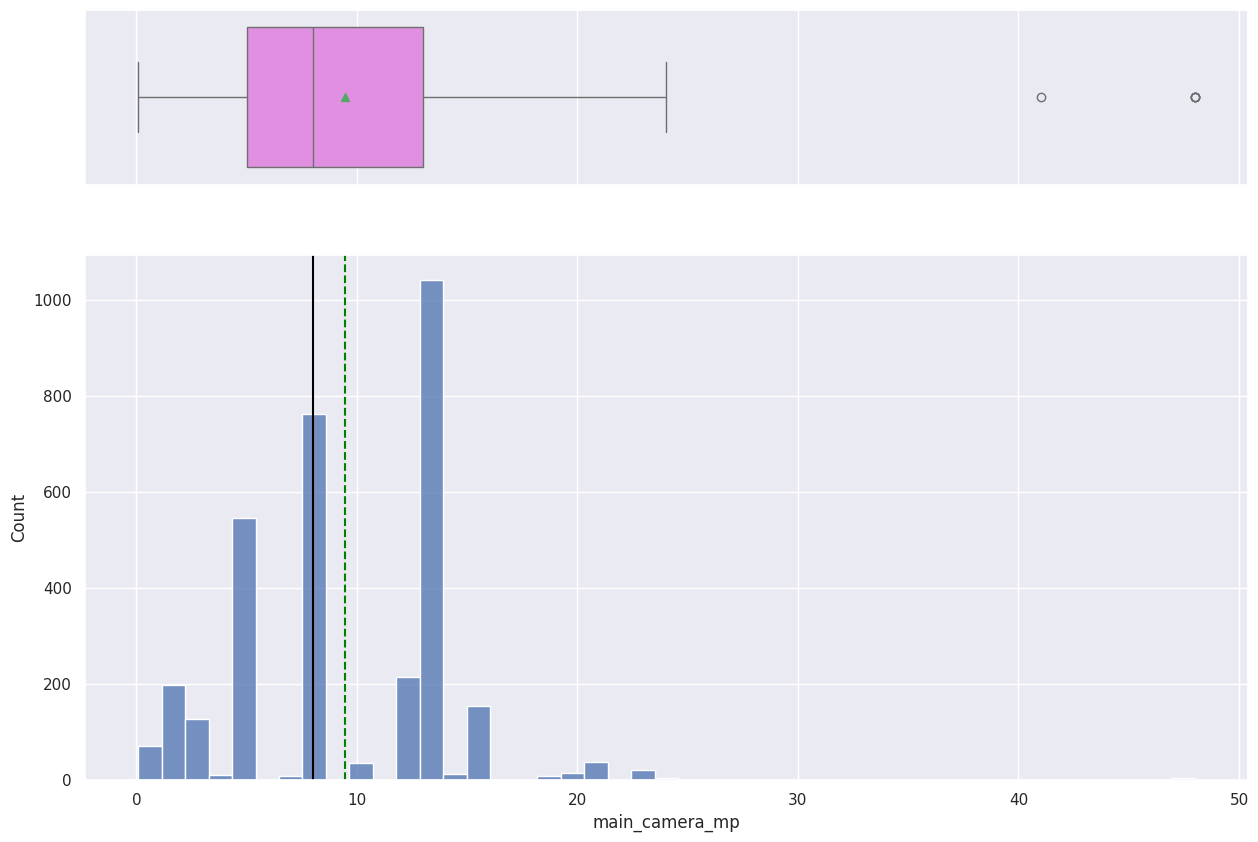

In [ ]:
histogram_boxplot(df, 'main_camera_mp')

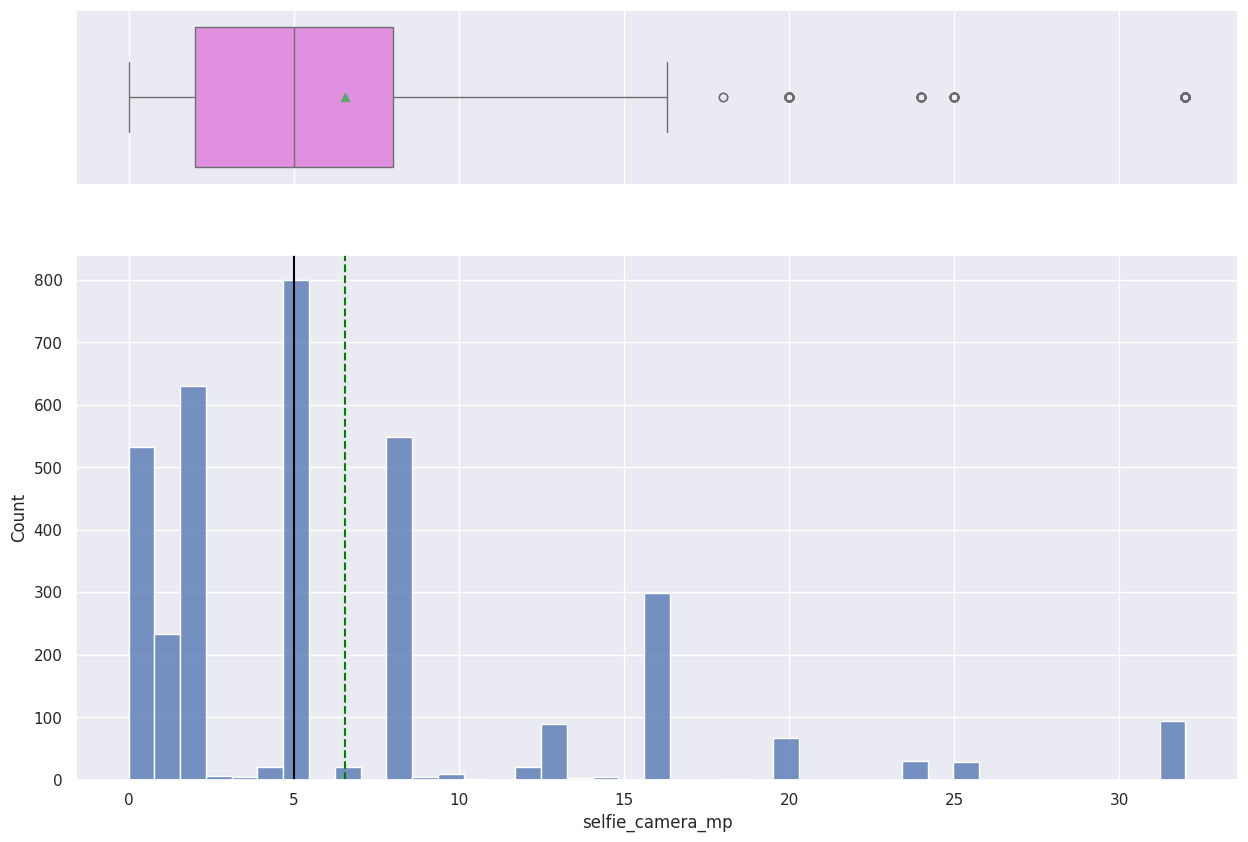

In [ ]:
histogram_boxplot(df, 'selfie_camera_mp')

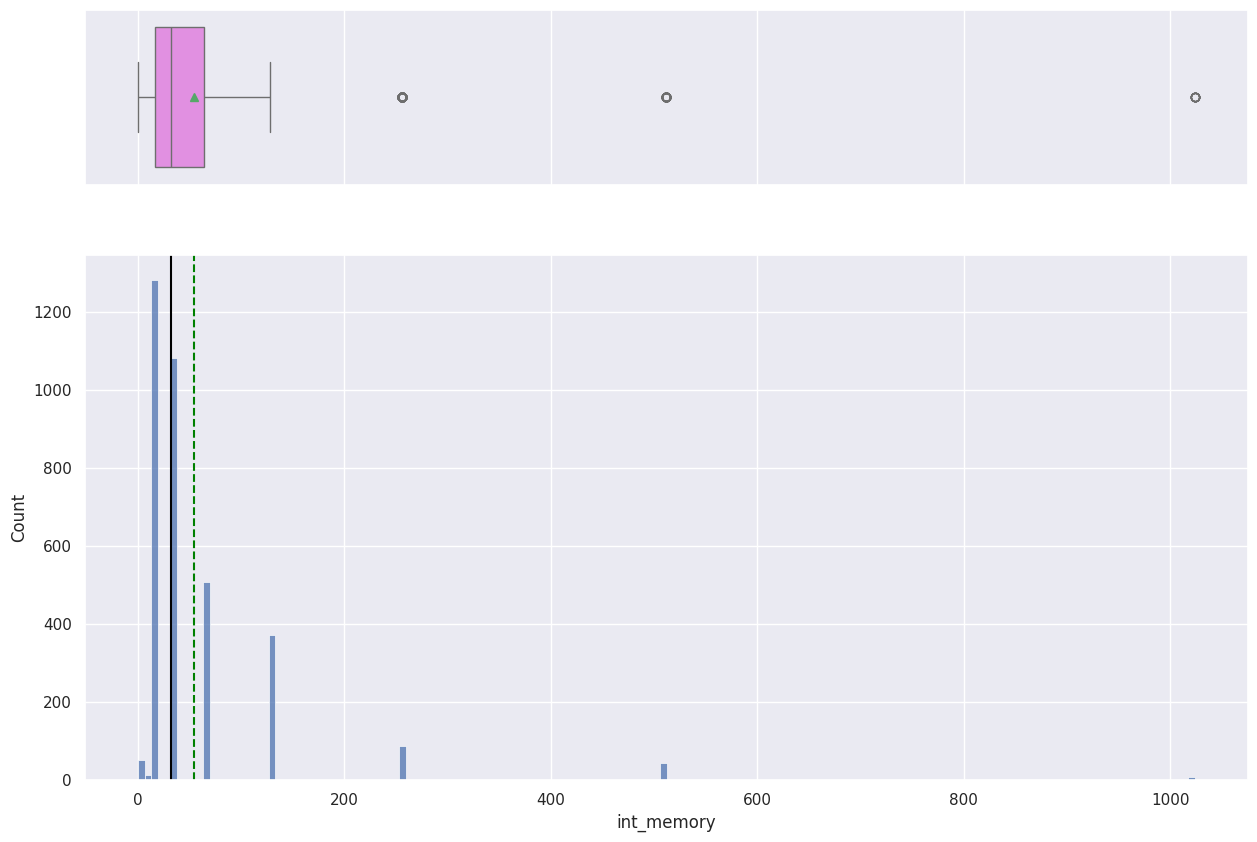

In [ ]:
histogram_boxplot(df, 'int_memory')

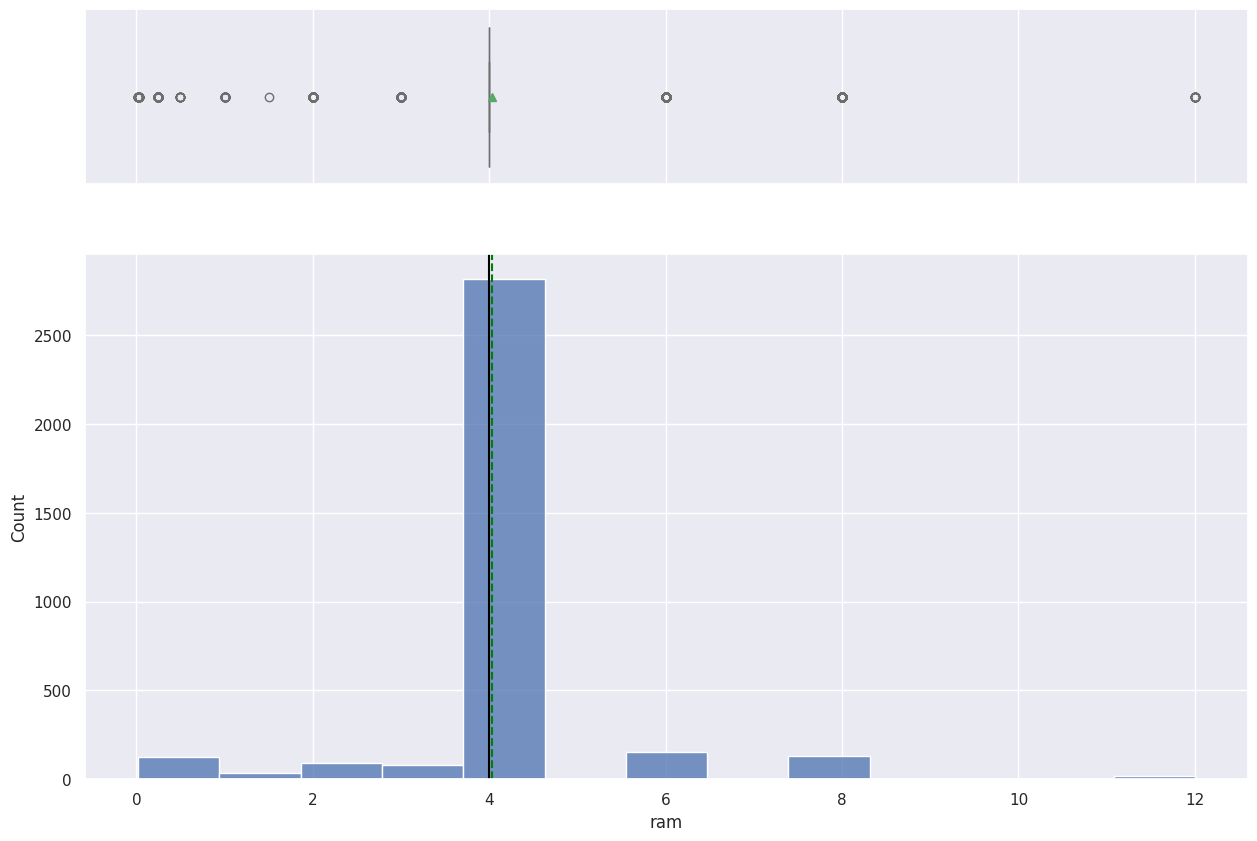

In [ ]:
histogram_boxplot(df, 'ram')

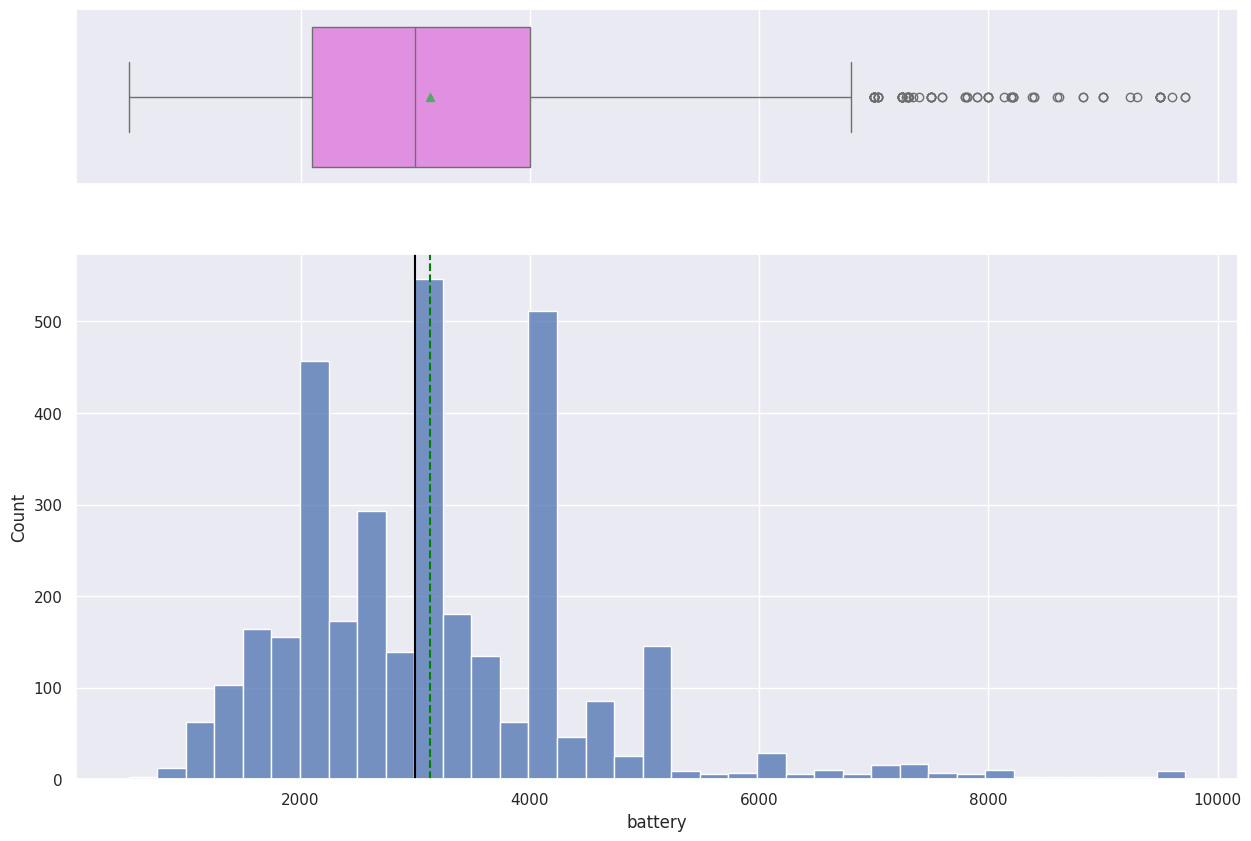

In [ ]:
histogram_boxplot(df, 'battery')

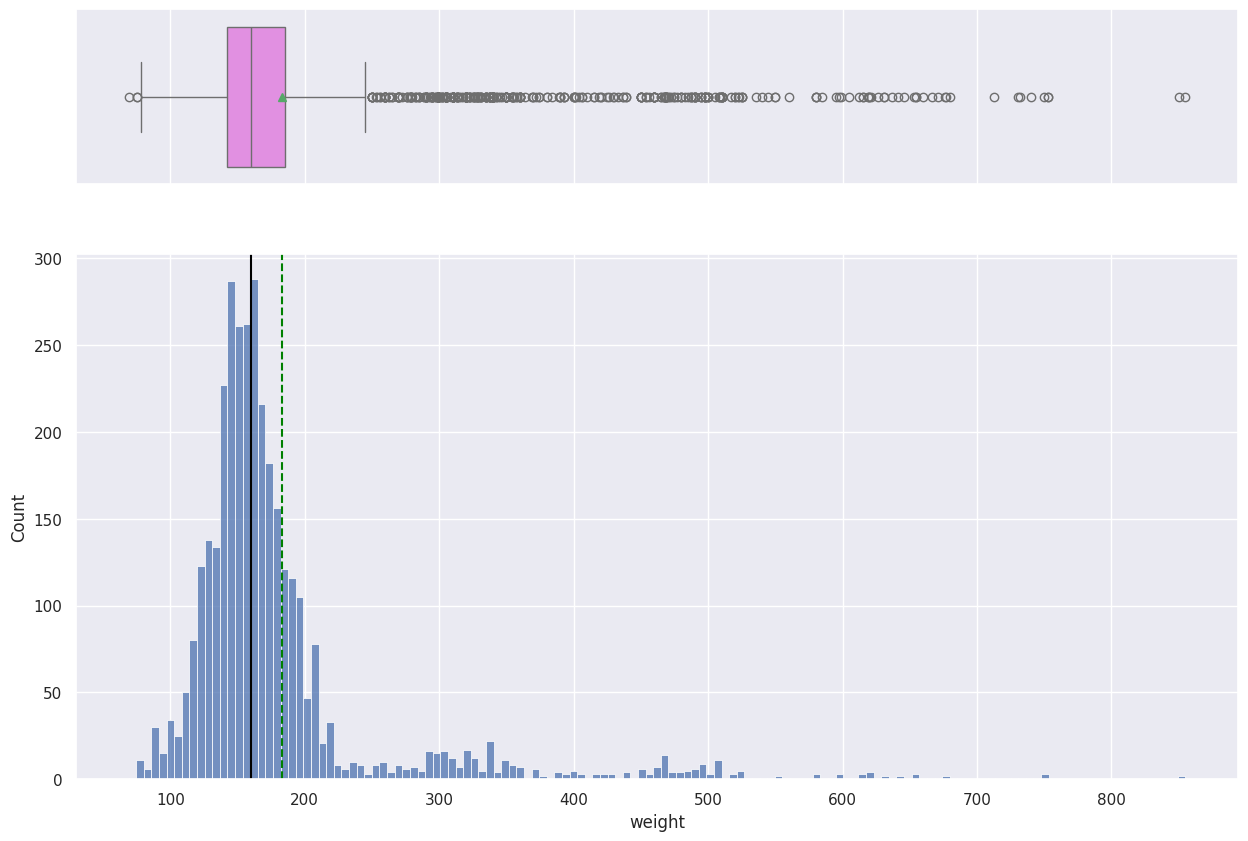

In [ ]:
histogram_boxplot(df, 'weight')

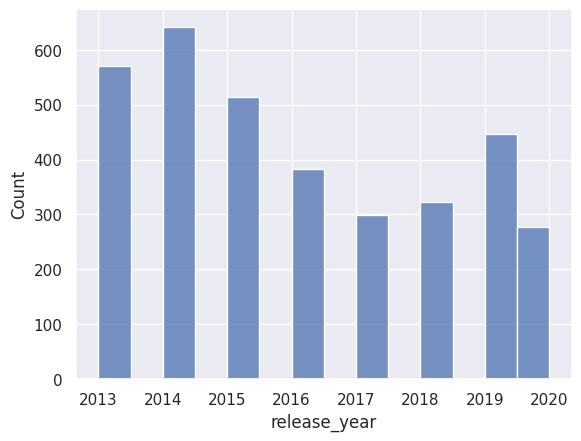

In [ ]:
sns.histplot(df['release_year'])
plt.show()

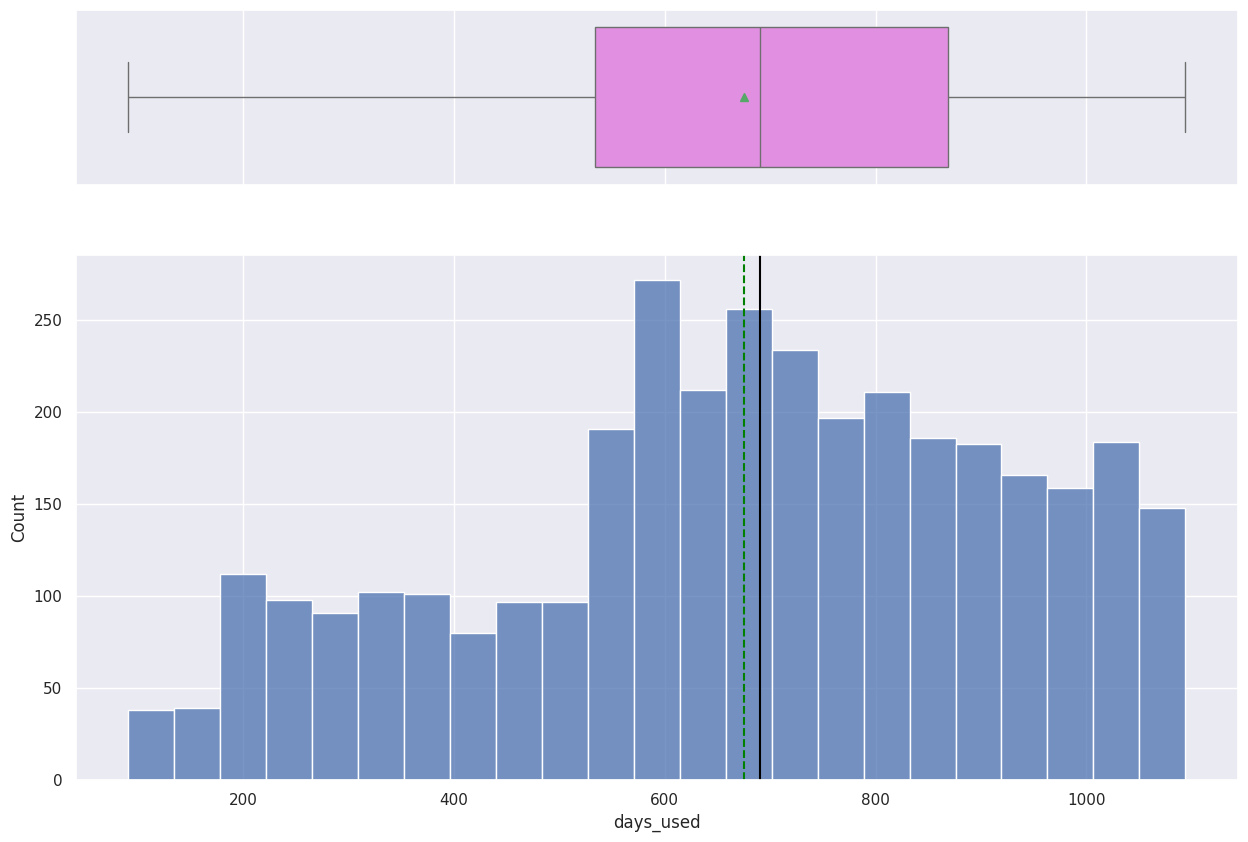

In [ ]:
histogram_boxplot(df, 'days_used')

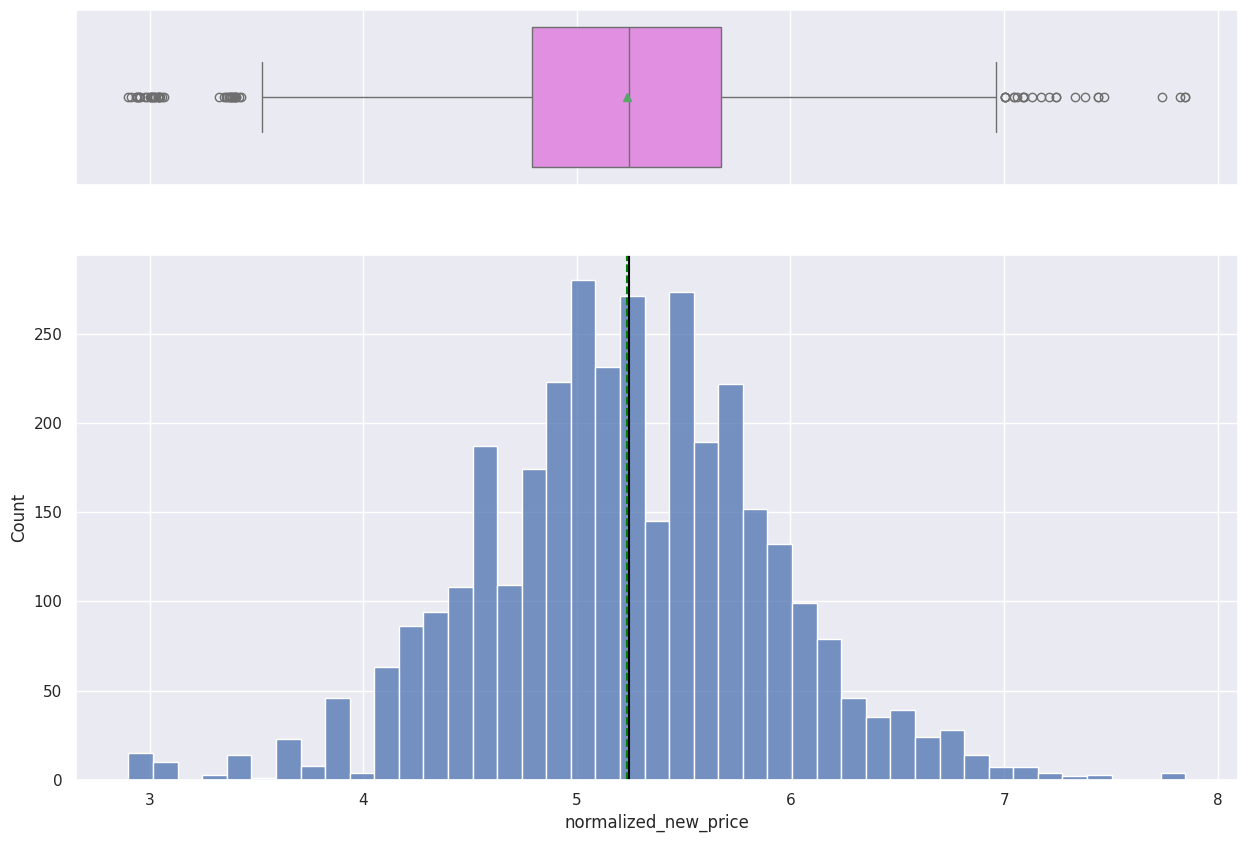

In [ ]:
histogram_boxplot(df, 'normalized_new_price')

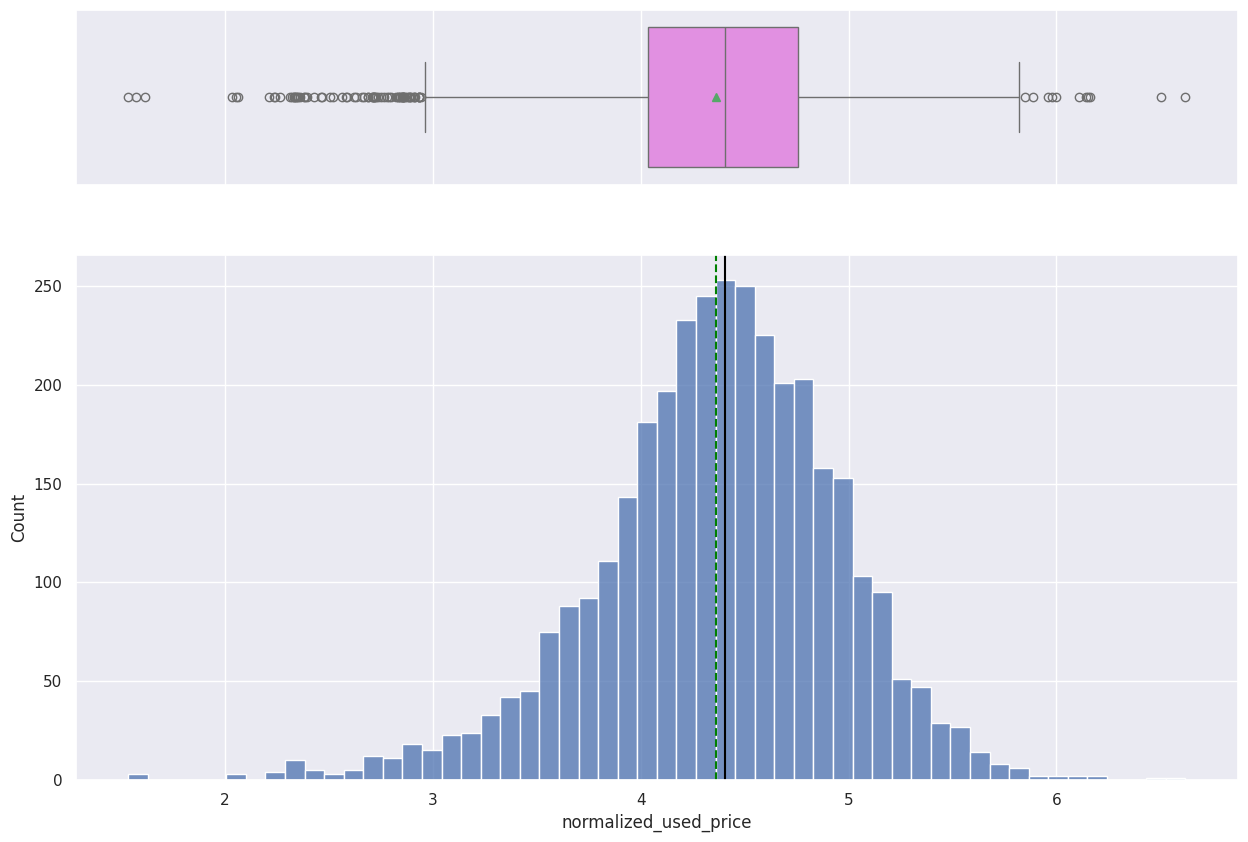

In [ ]:
histogram_boxplot(df, 'normalized_used_price')

In [ ]:
android_count = len(df[df['os'] == 'Android'])
total_devices = len(df)
android_percentage = (android_count / total_devices) * 100
print(f'{android_percentage:.2f}% of devices are Android.')

93.05% of devices are Android.


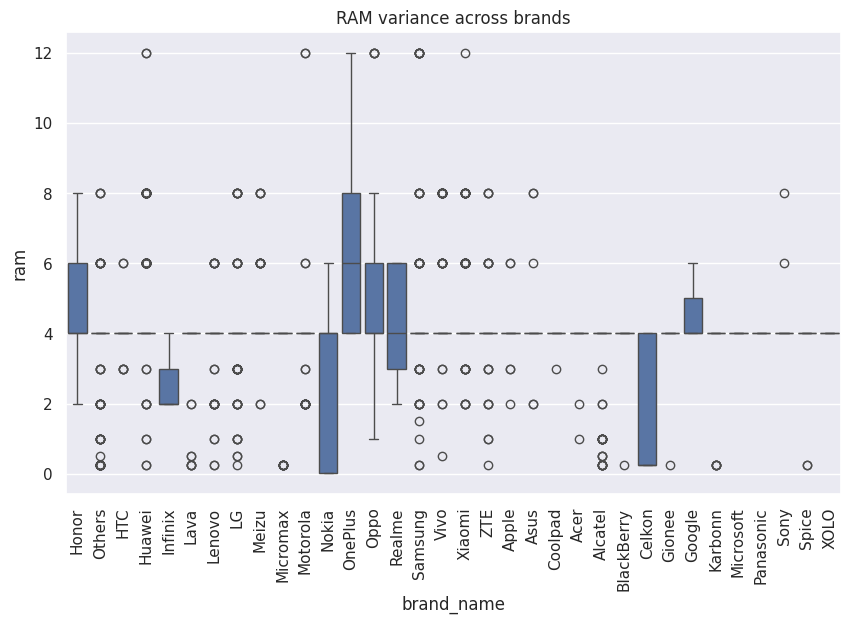

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('RAM variance across brands')
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

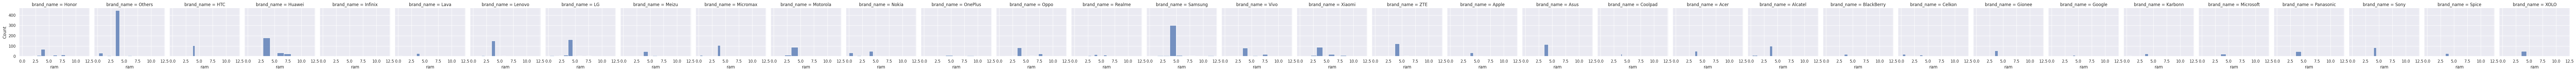

In [ ]:
bn = sns.FacetGrid(df, col='brand_name')
bn.map(sns.histplot,'ram');

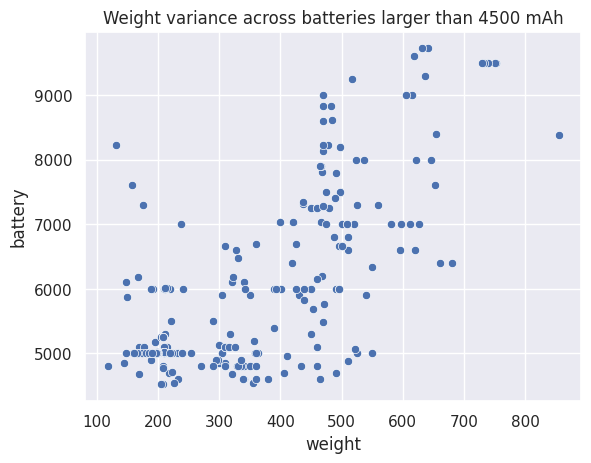

Weight and battey size have a positive correlation.


In [ ]:
large_battery = df[df['battery'] > 4500]

plt.title('Weight variance across batteries larger than 4500 mAh')
sns.scatterplot(x='weight', y='battery', data=large_battery)
plt.show()
print("Weight and battey size have a positive correlation.")

In [ ]:
large_screen = df[df['screen_size'] > 15.24]
brand_large_screen = large_screen.groupby('brand_name').size()
print("Amount of devices with screen sizes above 6 inches per brand:")
brand_large_screen

Amount of devices with screen sizes above 6 inches per brand:


,0
brand_name,
Acer,19
Alcatel,26
Apple,24
Asus,41
Coolpad,3
Gionee,3
Google,4
HTC,7
Honor,72


In [ ]:
good_selfie = df[df['selfie_camera_mp'] > 8]
brand_good_selfie = good_selfie.groupby('brand_name').size()
print("Amount of devices with selfie cameras above 8 MP per brand:")
brand_good_selfie

Amount of devices with selfie cameras above 8 MP per brand:


,0
brand_name,
Acer,1
Asus,6
BlackBerry,2
Coolpad,3
Gionee,4
HTC,20
Honor,41
Huawei,87
Infinix,4


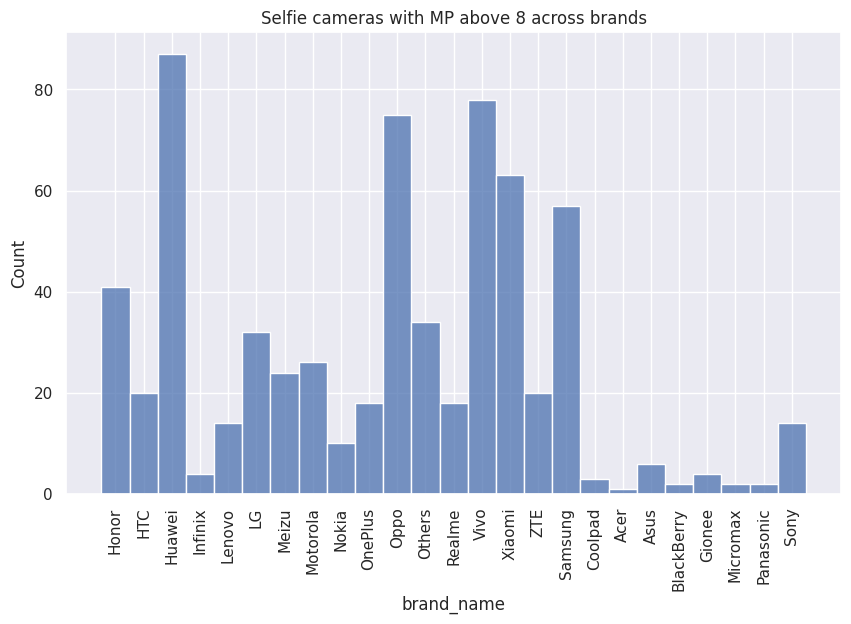

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Selfie cameras with MP above 8 across brands')
sns.histplot(data=df, x=good_selfie['brand_name'])
plt.xticks(rotation=90)
plt.show()

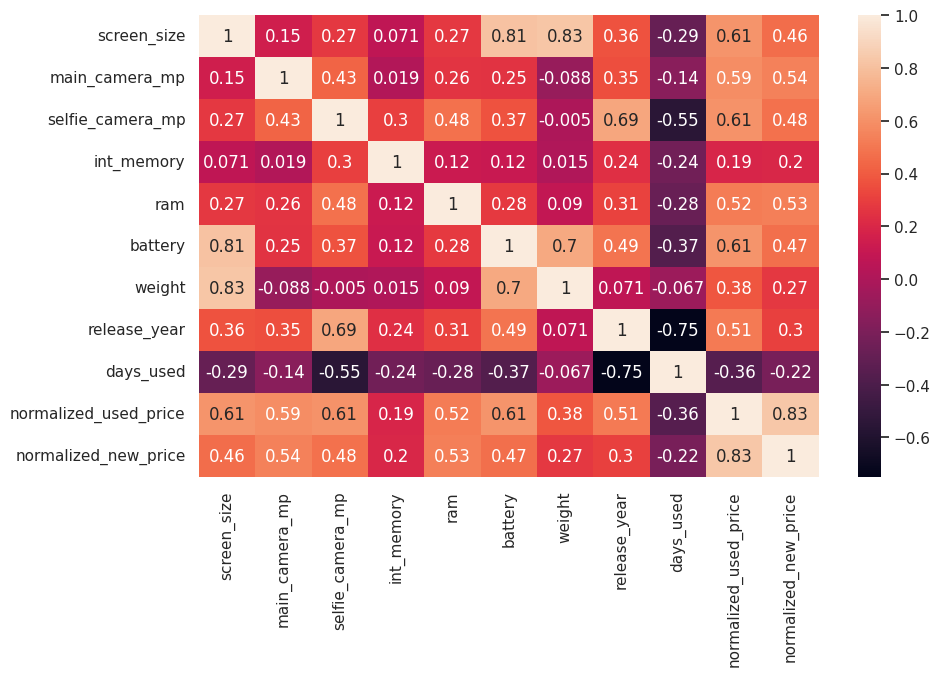

Normalized new price has a high correlaction with normalzied used price. Release year, battery, RAM, self camera MP, main camera MP, and screen size all have moderate correlations with normalzied used price.


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()
print("Normalized new price has a high correlaction with normalzied used price. Release year, battery, RAM, self camera MP, main camera MP, and screen size all have moderate correlations with normalzied used price.")

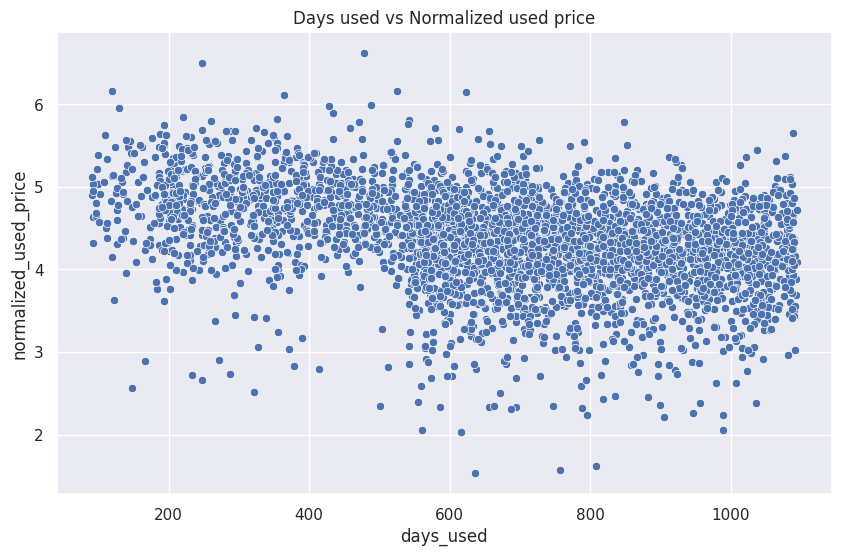

Days used and normalized used price appear to have a negative correlation.


In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Days used vs Normalized used price')
sns.scatterplot(data=df, x='days_used', y='normalized_used_price')
plt.show()
print("Days used and normalized used price appear to have a negative correlation.")

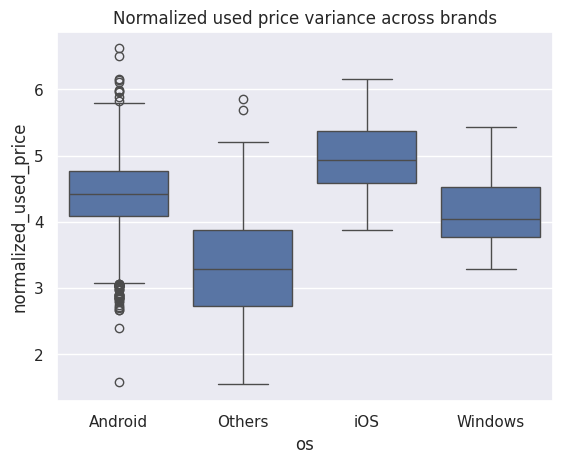

iOS has the highest median normalized used price.


In [ ]:
plt.title('Normalized used price variance across brands')
sns.boxplot(data=df, x='os', y='normalized_used_price')
plt.show()
print("iOS has the highest median normalized used price.")

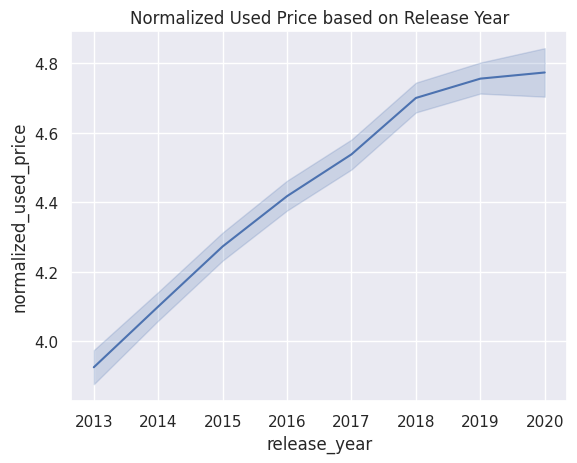

In [ ]:
plt.title('Normalized Used Price based on Release Year')
sns.lineplot(data=df, x='release_year', y='normalized_used_price')
plt.show()

<ipython-input-38-ee071a4e922b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='days_used', y='normalized_new_price', ci = False)


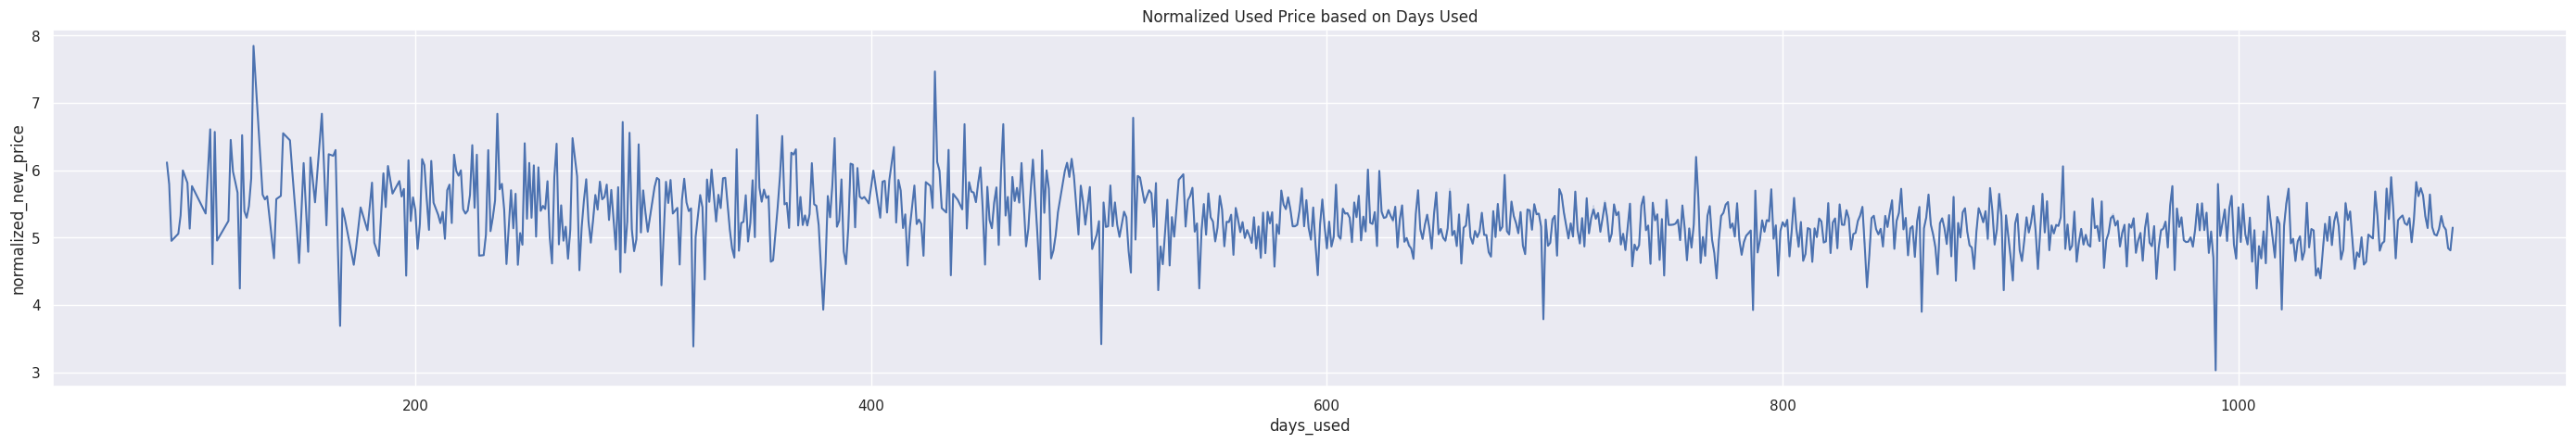

In [ ]:
plt.figure(figsize = (35,5))
plt.title('Normalized Used Price based on Days Used')
sns.lineplot(data=df, x='days_used', y='normalized_new_price', ci = False)
plt.show()

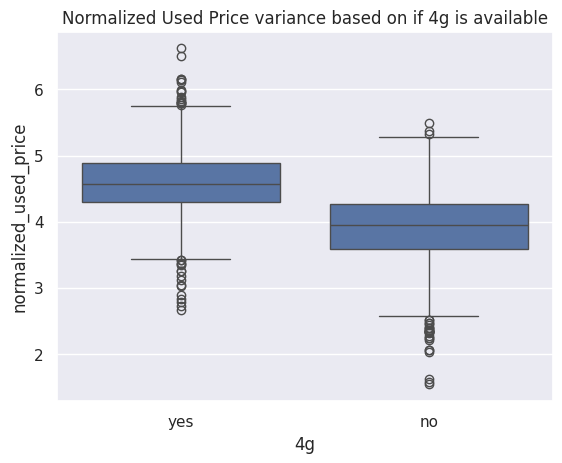

In [ ]:
plt.title('Normalized Used Price variance based on if 4g is available')
sns.boxplot(data=df, x='4g', y='normalized_used_price')
plt.show()

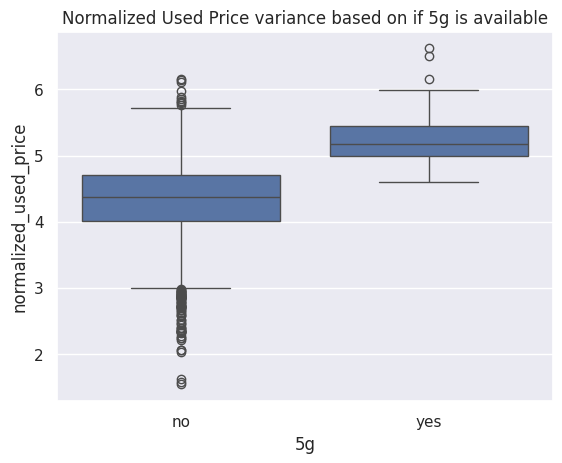

In [ ]:
plt.title('Normalized Used Price variance based on if 5g is available')
sns.boxplot(data=df, x='5g', y='normalized_used_price')
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [ ]:
df1 = df.copy()

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=['number']).columns.to_list()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* All missing values have been treated.

In [ ]:
df1['years_since_release'] = 2021 - df1['release_year']
df1.drop('release_year', axis=1, inplace=True)
df1['years_since_release'].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


* Years_since_release of phone has been added in order to get a better picture of the age of the phone.

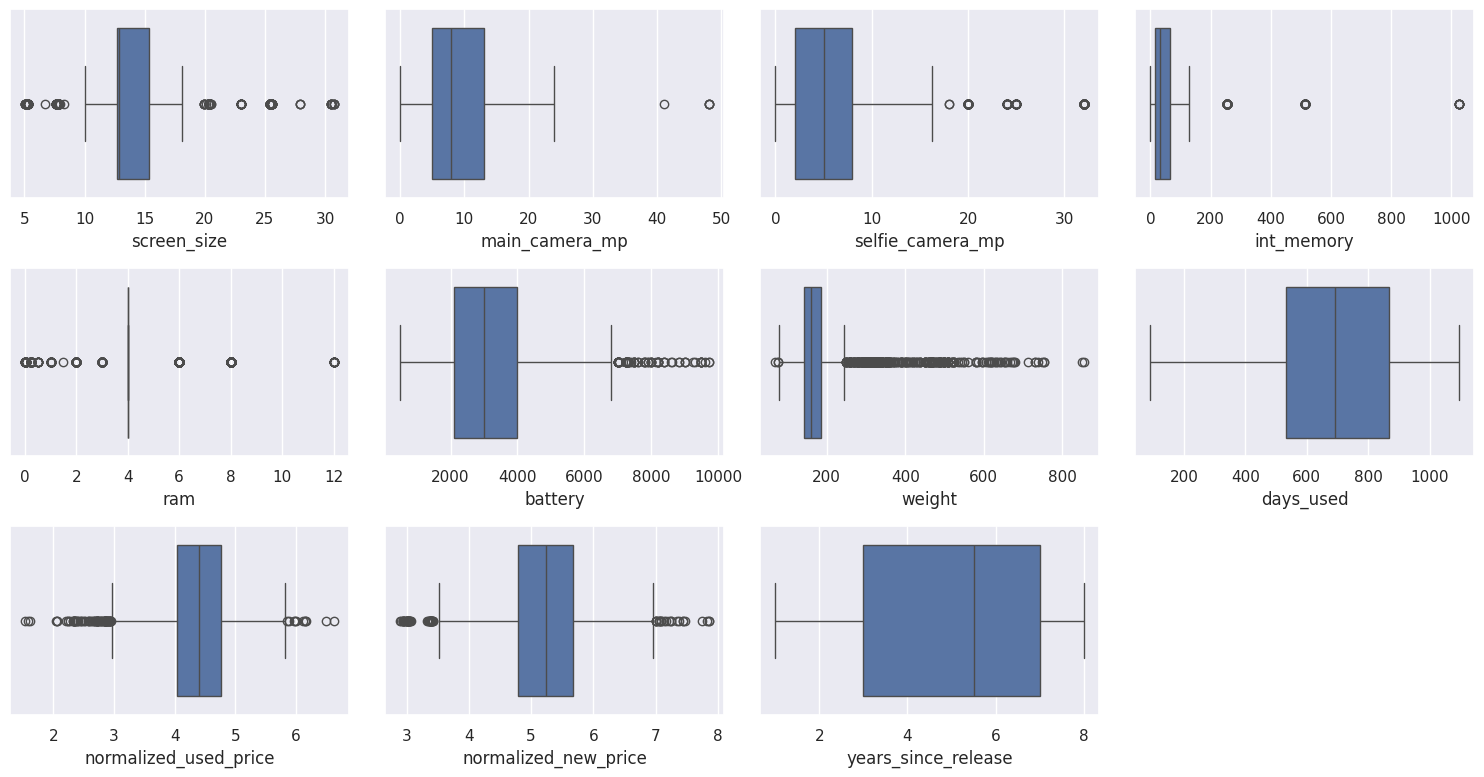

In [ ]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout()

plt.show()

In [ ]:
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
X = sm.add_constant(X)

In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df1.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.384534,6.553329,54.546957,4.036080,3133.170961,182.705761,674.869716,4.364712,5.233107,5.034742
std,3.805280,4.700148,6.968453,84.926611,1.364314,1298.565062,88.329494,248.580166,0.588914,0.683637,2.298455
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,91.000000,1.536867,2.901422,1.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,533.500000,4.033931,4.790342,3.000000
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,690.500000,4.405133,5.245892,5.500000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,868.750000,4.755700,5.673718,7.000000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,1094.000000,6.619433,7.847841,8.000000


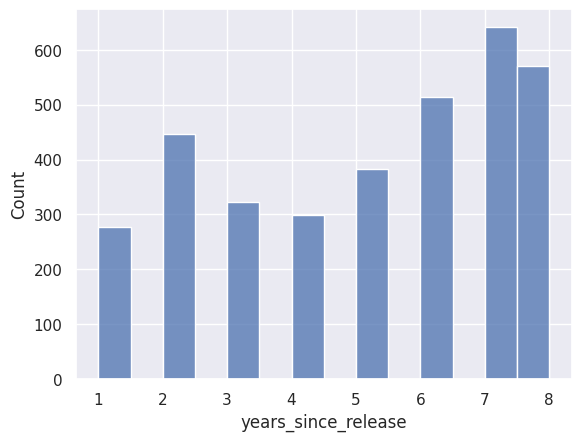

In [ ]:
sns.histplot(df1['years_since_release'])
plt.show()

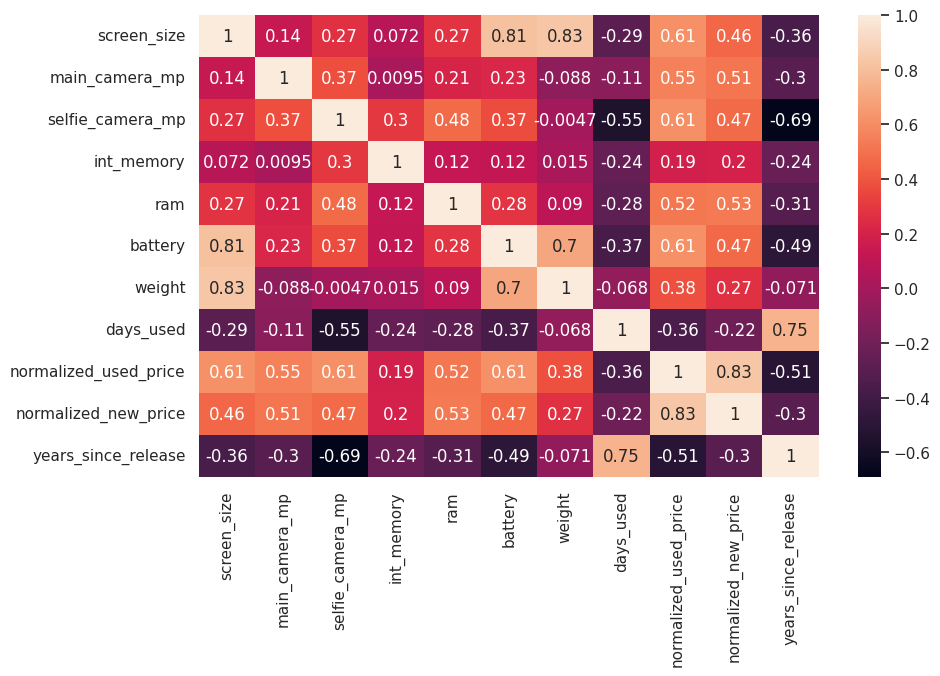

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True)
plt.show()

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                           01:55:37   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


In [ ]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238306,0.184064,0.842547,0.834731,4.488006


**Observations**
* The training R-squared is 0.84, so the model is not underfitting.
* The train and test RMSE and MAE are comparable, so the model is not overfitting.
* MAE suggests that the model can predict the normalized price of used devices with a mean error of 0.18 on the test data.
* MAPE of 4.50 on the test data means that we are able to predict the normalized price of the used device within 4.50%.



## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Test for Multicollinearity**

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,228.603553
1,screen_size,7.680705
2,main_camera_mp,2.136597
3,selfie_camera_mp,2.808416
4,int_memory,1.361465
5,ram,2.258272
6,battery,4.073582
7,weight,6.380746
8,days_used,2.669393
9,normalized_new_price,3.121941


**Removing Multicollinearity**

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):

    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838448,0.234655
1,weight,0.838179,0.234849


In [ ]:
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,209.720532
1,screen_size,3.587136
2,main_camera_mp,2.053009
3,selfie_camera_mp,2.783003
4,int_memory,1.361385
5,ram,2.255967
6,battery,3.676577
7,days_used,2.655895
8,normalized_new_price,3.119479
9,years_since_release,4.706889


**High P-Values**

In [ ]:
predictors = x_train2.copy()
cols = x_train2.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = x_train2[cols]

    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                           02:11:00   Log-Likelihood:                 80.678
No. Observations:                   2417   AIC:                            -137.4
Df Residuals:                       2405   BIC:                            -67.87
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234027,0.183223,0.839244,0.838442,4.394479


In [ ]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238711,0.18453,0.842012,0.840161,4.492714


**Observation**
* The variables dropped did not affect the model, as the adjusted R-squared value did not change

**Test for Linearity and Independence**

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod2.fittedvalues
df_pred["Residuals"] = olsmod2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.859368,0.228120
1525,4.448399,4.621124,-0.172724
1128,4.315353,4.279584,0.035768
3003,4.282068,4.251382,0.030686
2907,4.456438,4.447149,0.009289


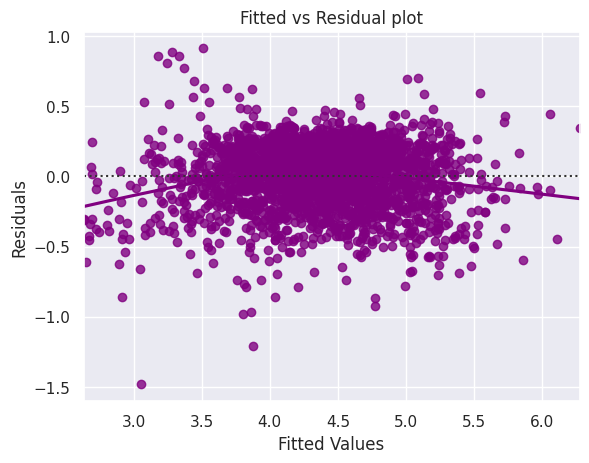

In [ ]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There is not pattern in the plot, therefore, the assumptios of linearity and independence are satisfied.

**Test for Normality**

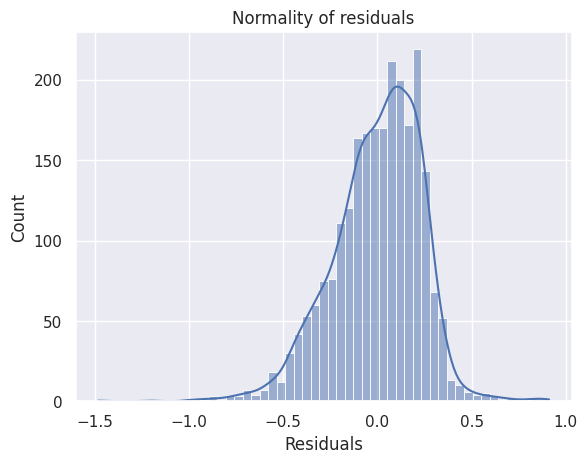

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

*   The histogram of residuals has a bell shape.



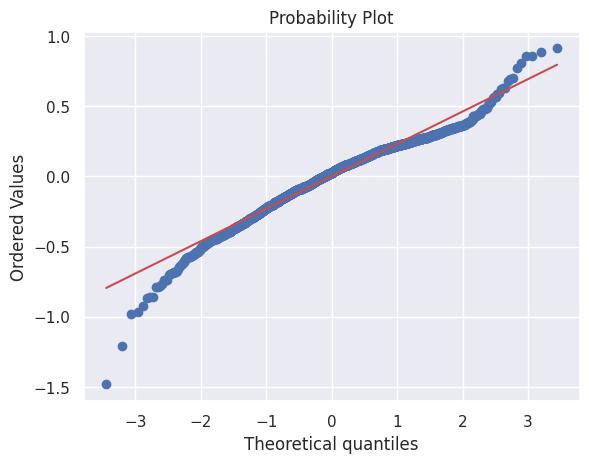

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals follow a fairly straight line, besides the tails.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9720101035105299, pvalue=2.4575660044907265e-21)

* The p-value is less than 0.05, therefore, the residuals are not normal according to the Shapiro-Wilk test.
* Based of the distribution plot and the Q-Q plot, the distribution is considered to be a good approximation of the normal distribution.

**Test for Homoscedascity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.060776416540641), ('p-value', 0.15382563344812808)]

* The p-value is less than 0.05, therefore, the residuals are homoscedastic.

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                           02:29:25   Log-Likelihood:                 80.678
No. Observations:                   2417   AIC:                            -137.4
Df Residuals:                       2405   BIC:                            -67.87
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234027,0.183223,0.839244,0.838442,4.394479


In [ ]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238711,0.18453,0.842012,0.840161,4.492714


* The model is able to explain ~84% of the variation in the data.
* The train and test RMSE and MAE are low and comparable, therefore, the model is not overfitting.
* The MAPE on the test set suggests that we can predict ~4.49% of the normalized price of a used device.

## Actionable Insights and Recommendations

* The model is able to explain ~84% of the variation in the data and within ~4.49% of the normalzied prices of used devices on the test data, which indicates that the model is good for prediction and inference purposes.
* If the screen size of a device increases by one unit, it's normalzied price of the used device increases by 0.043 units, all other variables held constant.
* If the main camera mega pixels of a device increases by one unit, it's normalzied price of the used device increases by 0.0188 units, all other variables held constant.
* If the selfie camera mega pixels of a device increases by one unit, it's normalzied price of the used device increases by 0.0131 units, all other variables held constant.
* If the RAM of a device increases by one unit, it's normalzied price of the used device increases by 0.0199 units, all other variables held constant.
* If the normalized new price of a device increases by one unit, it's normalzied price of the used device increases by 0.428 units, all other variables held constant.
* If the years since the release of a device increases by one unit, it's normalzied price of the used device decreases by 0.0148 units, all other variables held constant.
* As the screen size increases, the normalized price of the used device increases, therefore the company can improve it's marketing toward tablets, which typically have larger screens.
* Increase marketing as a sustainable alternative to buying new phones.
* Offer promotional credit to customers who send in devices with screens above 20 CM.


___